In [1]:
import warnings;warnings.filterwarnings("ignore")
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
Image(url="https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-09-at-3-42-21-am.png?w=568&h=303")

In [3]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1,1)
    def forward(self,x):
        return self.linear(x)

In [4]:
n = Net()

inp = torch.tensor([float(i) for i in range(1,1000)])

target = torch.tensor([float(i)*2 for i in range(1,1000)])

crit = nn.MSELoss()

optimizer = optim.SGD(n.parameters(),lr=1e-8)

# Initial Weights and Bias:-

**Weights are initialized using:**<br> 
    \begin{equation*}
    u(-\sqrt{k},\sqrt{k})
    \end{equation*}
    where,<br>
    \begin{equation*}
    k=\frac{1}{in\_features}
    \end{equation*}
    <br>
    u - uniform distribution
       
       
**Reference:** <a href="https://pytorch.org/docs/stable/nn.html?highlight=nn%20linear#torch.nn.Linear">Pytorch Linear</a>    
    

In [5]:
for param in n.named_parameters():
    print(param[0],param[1],param[1].shape)

linear.weight Parameter containing:
tensor([[-0.6696]], requires_grad=True) torch.Size([1, 1])
linear.bias Parameter containing:
tensor([-0.6116], requires_grad=True) torch.Size([1])


In [6]:
updated_weights=[]
losses=[]
loss=None
for epoch in range(1):
    for idx,(data,targ) in enumerate(zip(inp,target)):
        if (idx+1)%50==0:
            print(loss)
        optimizer.zero_grad()
        output = n(data.reshape(-1))
        loss =crit(output,targ.reshape(-1))
        updated_weights.append(n.linear.weight.data[0,0].item())
        losses.append(loss)
        loss.backward()
        optimizer.step()
print(loss)

tensor(17245.3379, grad_fn=<MseLossBackward>)
tensor(69283.0469, grad_fn=<MseLossBackward>)
tensor(151920.4062, grad_fn=<MseLossBackward>)
tensor(254839.5781, grad_fn=<MseLossBackward>)
tensor(360704.7812, grad_fn=<MseLossBackward>)
tensor(447444.6250, grad_fn=<MseLossBackward>)
tensor(494027.2500, grad_fn=<MseLossBackward>)
tensor(488002.9688, grad_fn=<MseLossBackward>)
tensor(431152.0625, grad_fn=<MseLossBackward>)
tensor(339537.2500, grad_fn=<MseLossBackward>)
tensor(237060.2188, grad_fn=<MseLossBackward>)
tensor(145764.2812, grad_fn=<MseLossBackward>)
tensor(78340.4688, grad_fn=<MseLossBackward>)
tensor(36500.8203, grad_fn=<MseLossBackward>)
tensor(14615.7529, grad_fn=<MseLossBackward>)
tensor(4984.0635, grad_fn=<MseLossBackward>)
tensor(1433.5818, grad_fn=<MseLossBackward>)
tensor(344.2946, grad_fn=<MseLossBackward>)
tensor(68.2681, grad_fn=<MseLossBackward>)
tensor(11.0204, grad_fn=<MseLossBackward>)


In [7]:
for param in n.named_parameters():
    print(param)

('linear.weight', Parameter containing:
tensor([[1.9973]], requires_grad=True))
('linear.bias', Parameter containing:
tensor([-0.6048], requires_grad=True))


In [8]:
n(torch.tensor([float(1000)]))

tensor([1996.7438], grad_fn=<AddBackward0>)

In [9]:
updated_weights = np.array(updated_weights)
losses = np.array(losses)

# Gradient Descent

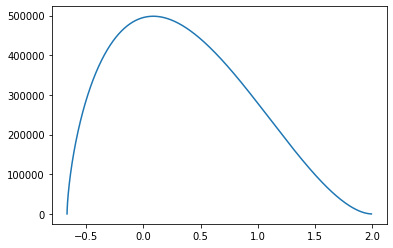

In [10]:
plt.plot(updated_weights,losses)